In [3]:
# Create dependencies and settings
import pandas as pd
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Read data
complete_vertical_csv = '../csv/complete_data/complete_vertical.csv'
complete_vertical = pd.read_csv(complete_vertical_csv)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  """


# Genre Analysis

In [4]:
# Clone and rename genre column and verify
complete_vertical.rename(columns={'listed_in': 'genre_level_1'}, inplace=True)
complete_vertical.insert(11, 'genre_level_2', complete_vertical['genre_level_1'])
complete_vertical.columns 

Index(['ID', 'title', 'score', 'director', 'cast', 'country', 'added',
       'release', 'rating', 'duration', 'genre_level_1', 'genre_level_2',
       'description', 'platform'],
      dtype='object')

In [5]:
# Return a list of genres 
complete_vertical['genre_level_1'].unique()

array(['Drama', 'International', 'Sports', 'Documentaries',
       'Action & Adventure', 'Comedies', 'Thriller', 'Independent Movies',
       'Music', 'Stand Up', 'Sci-Fi & Fantasy',
       'Children & Family Movies', 'Horror', 'Romance', 'LGBTQ',
       'Classic Movies', 'Cult Movies', 'Family', 'Anime', 'Crime',
       'Action', 'Adventure', 'Suspense', 'Mystery', 'Animals & Nature',
       'Black Stories', 'Arthouse', 'Teen', 'Faith & Spirituality',
       'Kids', 'Western', 'Arts', 'Entertainment', nan,
       'Special Interest', 'Coming of Age', 'History', 'Animation',
       'News', 'Cartoons', 'Romantic Comedies', 'Adult Animation',
       'Buddy', 'Lifestyle & Culture', 'Movies', 'Military and War',
       'Fantasy', 'Biographical', 'Dance', 'Disaster', 'Anthology',
       'Spy/Espionage', 'Parody', 'Survival', 'Superhero', 'Reality',
       'Medical', 'Variety', 'Science & Technology'], dtype=object)

In [19]:
# Coerce unspecified genres to NaN, drop, then verify
complete_vertical['genre_level_1'].replace('', np.nan, inplace=True)
number_na = complete_vertical[pd.isna(complete_vertical['genre_level_1'])].groupby('platform').count().iloc[0,0]
vertical_no_na = complete_vertical[complete_vertical['genre_level_1'].notna()]
if not (len(complete_vertical['ID']) - (len(vertical_no_na['ID']) + number_na)):
    print('true')

true


In [24]:
# Select films with ambiguous level 1 'movies' genre, drop, then verify
number_movies_genre = len(vertical_no_na[vertical_no_na['genre_level_1'] == 'Movies']['ID'])
vertical_clean = vertical_no_na[vertical_no_na['genre_level_1'] != 'Movies']
if not (len(vertical_no_na['ID']) - (len(vertical_clean['ID']) + number_movies_genre)):
    print('true')

true


In [27]:
# Create level 1 genres dictionary and verify you haven't left anything out 
genre_level_1_dict = {
    'Action': 'Action & Adventure',
    'Action & Adventure': 'Action & Adventure',
    'Adventure': 'Action & Adventure',
    'Adult Animation': 'Reality & Variety',
    'Animation': 'Animation',
    'Animals & Nature': 'Documentary',
    'Anime': 'Animation',
    'Anthology': 'Drama',
    'Arthouse': 'Drama',
    'Arts': 'Documentary',
    'Biographical': 'Documentary',
    'Black Stories': 'Documentary',
    'Buddy': 'Comedy',
    'Cartoons': 'Animation',
    'Children & Family Movies': 'Family',
    'Classic Movies': 'Drama',
    'Coming of Age': 'Drama',
    'Comedies': 'Comedy',
    'Crime': 'Thriller',
    'Cult Movies': 'Drama',
    'Dance': 'Music',
    'Disaster': 'Thriller',
    'Documentaries': 'Documentary',
    'Drama': 'Drama',
    'Entertainment': 'Reality & Variety',
    'Faith & Spirituality': 'Reality & Variety',
    'Family': 'Family',
    'Fantasy': 'Sci-Fi & Fantasy',
    'History': 'Documentary',
    'Horror': 'Horror',
    'Independent Movies': 'Drama',
    'International': 'International',
    'Kids': 'Family',
    'LGBTQ': 'Reality & Variety',
    'Lifestyle & Culture': 'Reality & Variety',
    'Medical': 'Documentary',
    'Military and War': 'Documentary',
    'Movies': '',
    'Music': 'Music',
    'Mystery': 'Thriller',
    'News': 'Reality & Variety',
    'Parody': 'Comedy',
    'Reality': 'Reality & Variety',
    'Romance': 'Romance',
    'Romantic Comedies': 'Romance',
    'Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
    'Science & Technology': 'Documentary',
    'Special Interest': 'Reality & Variety',
    'Sports': 'Sports',
    'Spy/Espionage': 'Thriller',
    'Stand Up': 'Comedy',
    'Superhero': 'Superhero',
    'Survival': 'Comedy',
    'Suspense': 'Thriller',
    'Teen': 'Family',
    'Thriller': 'Thriller',
    'Variety': 'Reality & Variety',
    'Western': 'Western',
}
keys = list(set(genre_level_1_dict.keys()))
values = list(set(genre_level_1_dict.values()))
genres = list(complete_vertical['genre_level_1'].unique())
diff1 = list(set(keys) - set(genres))
diff2 = list(set(genres) - set(keys))
print("Values in keys but not in genres:", diff1)
print("Keys len:", len(keys))
print("Values in genres but not in keys:", diff2)
print("Genres len:", len(genres))

Values in keys but not in genres: []
Keys len: 58
Values in genres but not in keys: [nan]
Genres len: 59


In [28]:
# Create level 1 genres and verify
vertical_tiered_genres = vertical_clean.copy()
vertical_tiered_genres['genre_level_1'] = vertical_tiered_genres['genre_level_1'].replace(genre_level_1_dict)
vertical_tiered_genres['genre_level_1'].unique()

array(['Drama', 'International', 'Sports', 'Documentary',
       'Action & Adventure', 'Comedy', 'Thriller', 'Music',
       'Sci-Fi & Fantasy', 'Family', 'Horror', 'Romance',
       'Reality & Variety', 'Animation', 'Western', 'Superhero'],
      dtype=object)

In [79]:
# Find holes in genre level 1 data
holes = vertical_tiered_genres.groupby(['platform', 'genre_level_1'])['score'].count().unstack(level=1)
nan_columns = holes.columns[holes.isna().any()].tolist()
nan_rows = holes.index[holes.isna().any(axis=1)].tolist()
holes.loc[nan_rows, nan_columns].fillna('none')

genre_level_1,Horror,International,Superhero,Western
platform,,,,
Amazon Prime,266.0,123.0,none,95.0
Disney Plus,none,none,1.0,5.0
Hulu,139.0,22.0,none,none
Netflix,168.0,1533.0,none,none


In [95]:
# Find holes in genre 2 data
holes2 = vertical_tiered_genres.groupby(['platform', 'genre_level_2'])['score'].count().unstack(level=1)
nan_columns2 = holes2.columns[holes2.isna().any()].tolist()
nan_rows2 = holes2.index[holes2.isna().any(axis=1)].tolist()
holes2.loc[nan_rows2, nan_columns2].T.fillna('none')

platform,Amazon Prime,Disney Plus,Hulu,Netflix
genre_level_2,,,,
Action,470.0,none,129.0,none
Action & Adventure,none,217.0,none,441.0
Adult Animation,none,none,1.0,none
Adventure,109.0,none,120.0,none
Animals & Nature,none,102.0,none,none
Animation,28.0,270.0,none,none
Anime,1.0,none,2.0,30.0
Anthology,none,6.0,none,none
Arthouse,50.0,none,none,none


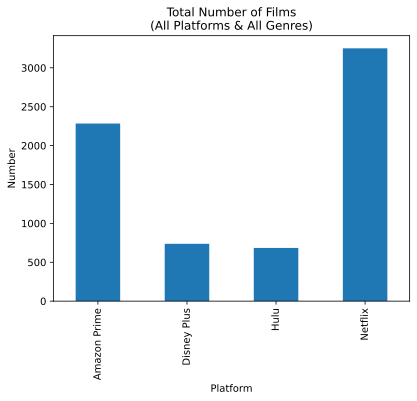

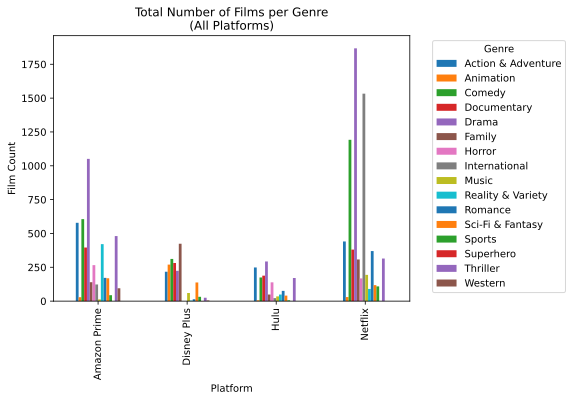

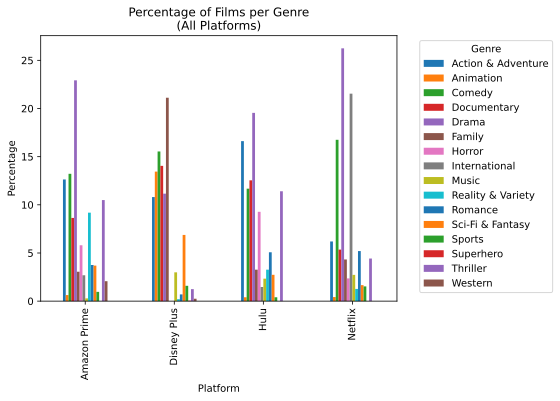

In [71]:
# Viz: total number of films per platform
data_no_duplicates = complete_vertical.drop_duplicates(subset='ID')
total_number_of_films = data_no_duplicates.groupby('platform').count().iloc[:,0]
total_number_of_films.plot(kind='bar', x='platform', y='ID', xlabel='Platform', ylabel='Number')
plt.title(f'Total Number of Films\n(All Platforms & All Genres)')
plt.show()

# Viz: total number of films per genre per platform 
genre1_count_unstacked = genre1_count.unstack(level=1)
ax = genre1_count_unstacked.plot(kind='bar', xlabel='Platform', ylabel='Film Count')
plt.title(f'Total Number of Films per Genre\n(All Platforms)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Viz: Percentage of films per level 1 genre per platform 
genre1_count = vertical_tiered_genres.groupby(['platform', 'genre_level_1'])['score'].count()
total_films_per_platform = vertical_tiered_genres.groupby('platform')['score'].count()
genre1_percentage = genre1_count.div(total_films_per_platform, level='platform') * 100
genre1_percentage_unstacked = genre1_percentage.unstack(level=1)
ax = genre1_percentage_unstacked.plot(kind='bar', xlabel='Platform', ylabel='Percentage')
plt.title(f'Percentage of Films per Genre\n(All Platforms)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

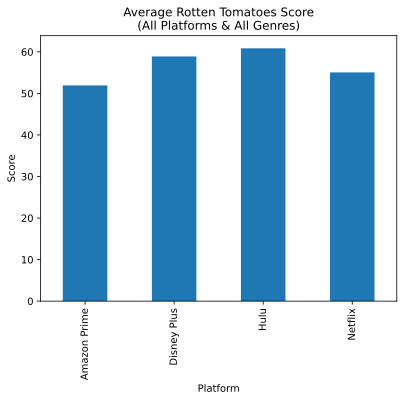

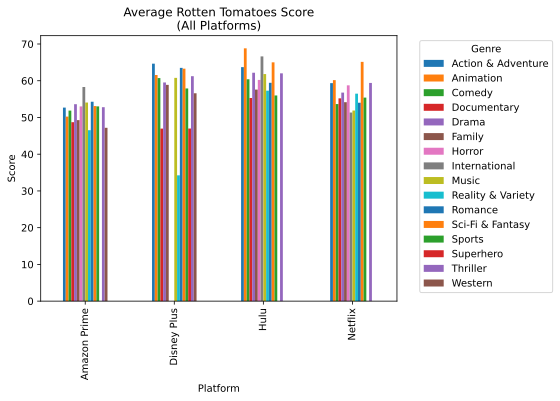

In [77]:
# Viz: Average RT scores for all films and all genres per platform
average_scores = vertical_tiered_genres.groupby('platform')['score'].mean()
average_scores.plot(kind='bar', x='platform', y='score', xlabel='Platform', ylabel='Score')
plt.title(f'Average Rotten Tomatoes Score\n(All Platforms & All Genres)')
plt.show()

# Viz: Average RT scores for films per level 1 genre per platform
genre1_scores = vertical_tiered_genres.groupby(['platform', 'genre_level_1'])['score'].mean()
genre1_scores_unstacked = genre1_scores.unstack(level=1)
ax = genre1_scores_unstacked.plot(kind='bar', xlabel='Platform', ylabel='Score')
plt.title(f'Average Rotten Tomatoes Score\n(All Platforms)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time Analysis

In [73]:
# Find holes in 'added' data
pd.to_datetime(films_added_over_time['added'])
no_genres_grouped = films_added_over_time.groupby(['platform', 'added']).count(
).iloc[:, 0].unstack(level=1).T.fillna(0, inplace=False)
no_genres_time_series = pd.to_datetime(no_genres_grouped.index)
no_genres_bins = pd.cut(no_genres_time_series, 15)
no_genres_binned = no_genres_grouped.groupby(no_genres_bins).sum()
no_genres_binned = no_genres_binned.iloc[:, 0:4]
year_index = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
no_genres_binned.index = year_index
no_genres_binned

platform,Amazon Prime,Disney Plus,Hulu,Netflix
2007,0.0,0.0,0.0,1.0
2008,0.0,0.0,0.0,1.0
2009,0.0,0.0,0.0,1.0
2010,0.0,0.0,0.0,1.0
2011,0.0,0.0,0.0,9.0
2012,0.0,0.0,0.0,0.0
2013,0.0,0.0,1.0,7.0
2014,0.0,0.0,4.0,18.0
2015,0.0,0.0,1.0,44.0
2016,0.0,0.0,4.0,179.0


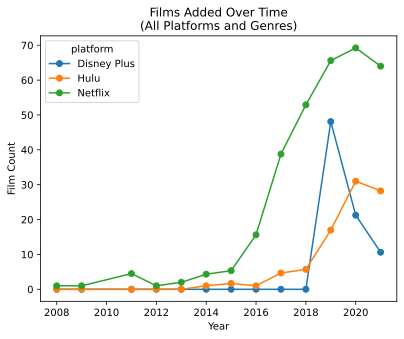

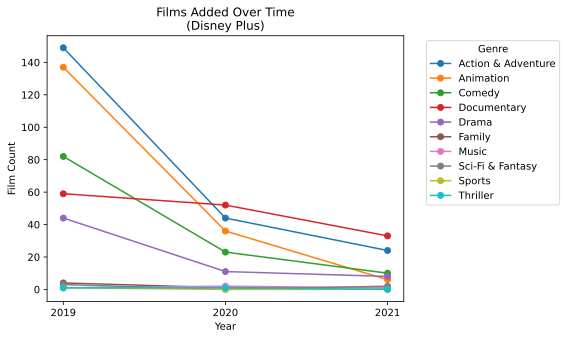

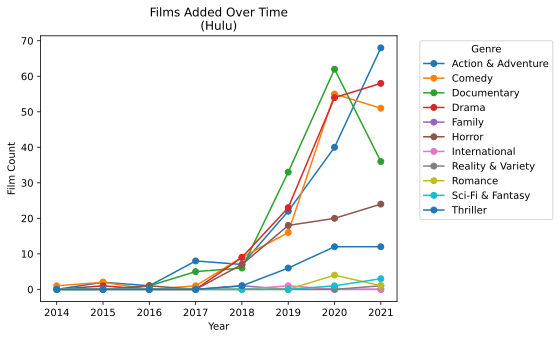

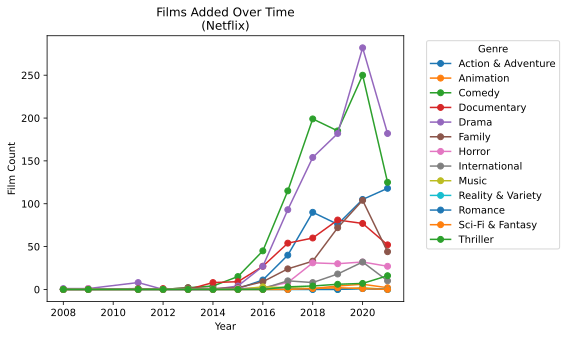

In [72]:
# Viz: Number of Films Added per Year per Platform
films_added_over_time = vertical_tiered_genres.drop_duplicates(subset='ID')
genre1_over_time = films_added_over_time.copy()
genre1_over_time['added'] = pd.to_datetime(genre1_over_time['added'])
genre1_over_time['added'] = genre1_over_time['added'].dt.year
genre1_grouped_plot = genre1_over_time.groupby(['platform', 'genre_level_1','added']).count().iloc[:,0]
data = genre1_grouped_plot.reset_index()
# data['year'] = data['year'].astype(int)
data.columns = ['platform', 'genre', 'year', 'count']
pivot_data = data.pivot_table(index='year', columns='platform', values='count', fill_value=0).iloc[:,1:]
pivot_data.plot(kind='line', marker='o')
plt.title(f'Films Added Over Time\n(All Platforms and Genres)')
plt.xlabel('Year')
plt.ylabel('Film Count')
plt.show()

# Viz: Number of Films Added per Year per Genre per Platform
platforms = data['platform'].unique()[1:]
for platform in platforms:
    platform_data = data[data['platform'] == platform]
    pivot_data = platform_data.pivot_table(index='year', columns='genre', values='count', fill_value=0)
    pivot_data.plot(kind='line', marker='o')
    plt.title(f'Films Added Over Time\n({platform})')
    plt.xlabel('Year')
    plt.ylabel('Film Count')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca() 
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  
    plt.show()

In [ ]:
# # ------- UNUSED CODE -------
# # Get average RT scores per genre level 2 for each platform 
# genre2_scores = vertical_tiered_genres.groupby(['platform', 'genre_level_2'])['score'].mean()
# genre2_scores
# # Calculate film count per genre per platform
# genre2_count = vertical_tiered_genres.groupby(['platform', 'genre_level_2'])['score'].count()
# # Calculate film percentage per genre per platform
# genre2_percentage = genre2_count.div(total_films_per_platform, level='platform') * 100
# genre2_percentage